<a href="https://colab.research.google.com/github/schizohub/PyTorch_lessons/blob/main/pytorch4_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries:
```torchvision```

```torch```

```matplotlib```

Important packages of ```torch and torchvision```

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


# Building Dataset by using torchvision.datasets which is for practicing CV(Computer vision)

Data -> **FashionMNIST**

In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
img, label = train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
img.shape, label

(torch.Size([1, 28, 28]), 9)

Shape of image: torch.Size([1, 28, 28])


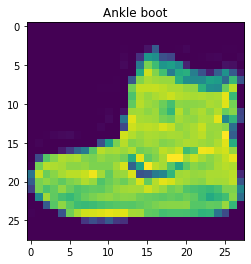

In [8]:
print(f"Shape of image: {img.shape}")
plt.imshow(img.squeeze());
plt.title(class_names[label]);

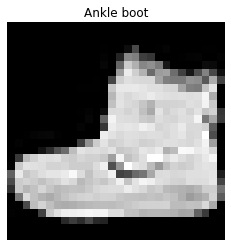

In [9]:
plt.imshow(img.squeeze(), cmap='gray');
plt.title(class_names[label]);
plt.axis(False);

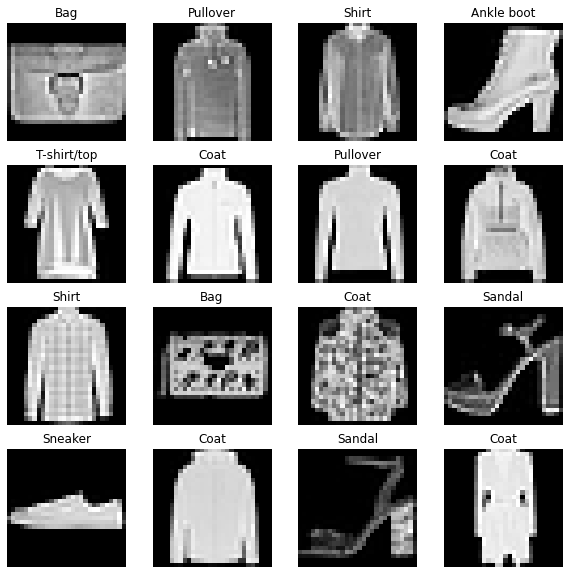

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
rows, cols= 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(1, len(train_data), size=[1]).item()
    # print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray');
    plt.title(class_names[label]);
    plt.axis(False);

# Bulding a dataloader which turns images into tensors

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [12]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f00a87fe520>, <torch.utils.data.dataloader.DataLoader object at 0x7f00a87fed00>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


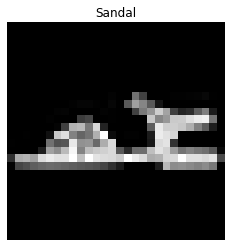

In [14]:
# torch.manual_seed(42)

random_idx = torch.randint(1, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray");
plt.title(class_names[label])
plt.axis(False);
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [15]:
model_flatten = nn.Flatten()

x = train_features_batch[0]

output = model_flatten(x)
print(f"Shape of x before flattening: {x.shape}")
print(f"Shape of flattened x: {output.shape}")

Shape of x before flattening: torch.Size([1, 28, 28])
Shape of flattened x: torch.Size([1, 784])


# **First NN model for CV(linearly)**

In [16]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [17]:
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Skip downloading this file!")
else:
    print("Downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

Skip downloading this file!


In [19]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [20]:
from timeit import default_timer as timer 

def timer_fn(
    start: float,
    end: float,
    device: torch.device =None):
    total_time = end-start
    print(f"Total time of the process is {total_time:.3f} on the {device}")
    return total_time

In [21]:
# start_time = timer()
# a = 0
# for i in range(1,1000000):
#     a+=i*i*i
# end_time = timer()
# timer_fn(start=start_time,
#       end=end_time,
#       device='cpu')

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Tuning(training) functions to see how model works and its performance

In [69]:
from tqdm.auto import tqdm
torch.manual_seed(42)
#Start time of training 
train_time_start_on_cpu = timer()

epochs = 3
def LoopThroughAll(epochs, model:torch.nn.Module,
                   loss_fn:torch.nn.Module,
                   optimizer,
                   train_dataloader: torch.utils.data.DataLoader, 
                   test_dataloader:torch.utils.data.DataLoader, 
                   device:torch.device=device):
#Creating train and test loop
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch} \n-------")
        #Training

        train_loss = 0 
        for batch, (X,y) in enumerate(train_dataloader):
            X = X.to(device)
            y = y.to(device)
            model.train()
            #Forward pass
            y_pred = model(X)

            #Calculate the train loss per batch
            loss = loss_fn(y_pred, y)

            train_loss+=loss # accumulate train loss

            #Optimizer zero grad
            optimizer.zero_grad()

            #Backpropagation
            loss.backward()

            #Optimizer step
            optimizer.step()

            #Print out what's happenin'
            if batch%400==0:
                print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

        train_loss/=len(train_dataloader)
      
        #Testing
        test_loss, test_acc = 0 , 0
        model.eval()

        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                X_test = X_test.to(device)
                y_test = y_test.to(device)
                #Forward pass
                test_pred = model(X_test)

                #Calculate the train loss per batch
                test_loss+=loss_fn(test_pred, y_test)

                #Calculate the test accuracy
                test_acc+=accuracy_fn(y_test, test_pred.argmax(dim=1))

            #Calculate the average loss per batch
            test_loss/=len(test_dataloader)

            #Calculate the average accuracy per batch
            test_acc/=len(test_dataloader)

        #Print out what's happenin'
        print(f"\nTrain loss: {train_loss:.4f}| Test loss:{test_loss:.4f}, Test acc: {test_acc:.4f}")

def LoopThroughTrain(model: torch.nn.Module,
                     data_loader:torch.utils.data.DataLoader,
                     optimizer,
                     loss_fn:torch.nn.Module,
                     accuracy_fn,
                     device:torch.device=device):
    train_loss, train_acc = 0,0
    model.train()
    for batch, (X,y) in enumerate(data_loader):
        X = X.to(device)
        y = y.to(device)
        
        #Forward pass
        y_pred = model(X)

        #Calculate the train loss per batch
        loss = loss_fn(y_pred, y)

        train_loss+=loss # accumulate train loss
        train_acc+=accuracy_fn(y, y_pred.argmax(dim=1))
        #Optimizer zero grad
        optimizer.zero_grad()

        #Backpropagation
        loss.backward()

        #Optimizer step
        optimizer.step()

    train_loss/=len(data_loader)
    train_acc/=len(data_loader)
    #Print out what's happenin'
    print(f"Train loss: {train_loss:.5f}| Train accuracy: {train_acc:.2f}%")

def LoopThroughTest(model: torch.nn.Module,
                    data_loader: torch.utils.data.DataLoader,
                    loss_fn: torch.nn.Module,
                    accuracy_fn,
                    device: torch.device=device):
    loss, acc = 0,0
    model.eval()
    #Evaluation with torch.inference_mode()
    with torch.inference_mode():
        for X, y in data_loader:
            #Send the data to target device
            X, y = X.to(device), y.to(device)

            #Forward pass            
            test_pred = model(X)

            #Calculate the loss and the acc
            loss+=loss_fn(test_pred, y)
            acc+=accuracy_fn(y, test_pred.argmax(dim=1))

        loss/=len(data_loader)
        acc/=len(data_loader)

        #Print out what's happenin'
        print(f"Test loss: {loss:.5f}| Test accuracy: {acc:.2f}%") 
# LoopThroughAll(3, model_0, loss_fn, optimizer, train_dataloader, test_dataloader)

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    LoopThroughTrain(model = model_0, 
                     data_loader = train_dataloader,
                     optimizer=optimizer, 
                     loss_fn=loss_fn,
                     accuracy_fn=accuracy_fn,
                     device=str(next(model_0.parameters()).device))
    

train_time_end_on_cpu = timer()
time_on_model_0 = timer_fn(start=train_time_start_on_cpu, 
         end=train_time_end_on_cpu,
         device=str(next(model_0.parameters()).device))
time_on_model_0

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.43594| Train accuracy: 84.70%
Epoch: 1
-------
Train loss: 0.42793| Train accuracy: 85.03%
Epoch: 2
-------
Train loss: 0.42403| Train accuracy: 85.21%
Epoch: 3
-------
Train loss: 0.42238| Train accuracy: 85.13%
Epoch: 4
-------
Train loss: 0.41865| Train accuracy: 85.39%
Epoch: 5
-------
Train loss: 0.41709| Train accuracy: 85.37%
Epoch: 6
-------
Train loss: 0.41419| Train accuracy: 85.41%
Epoch: 7
-------
Train loss: 0.41355| Train accuracy: 85.47%
Epoch: 8
-------
Train loss: 0.41098| Train accuracy: 85.57%
Epoch: 9
-------
Train loss: 0.40805| Train accuracy: 85.71%
Total time of the process is 82.041 on the cpu


82.04053525900054

In [24]:
next(model_0.parameters()).device

device(type='cpu')

In [70]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    loss, acc = 0,0
    model.eval()

    with torch.inference_mode():
        for X,y in tqdm(dataloader):
            #Make predictions
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)

            #Calculate the loss
            loss+=loss_fn(y_pred, y)
            acc+=accuracy_fn(y, y_pred.argmax(dim=1))
        #Scale acc and loos per batch
        loss/=len(dataloader)
        acc/=len(dataloader)

    return {"model_name":model.__class__.__name__,
            "model_loss": loss.item(),
            "model_accuracy":acc}

model_0_results = eval_model(model_0,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn,
                             device=str(next(model_0.parameters()).device))

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4831964075565338,
 'model_accuracy': 83.54632587859425}

In [26]:
!nvidia-smi

Sat Mar 25 17:57:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Second NN model for CV(non-linear)**

In [27]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU(),
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [28]:
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [29]:
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [71]:
train_time_start_on_cuda = timer()
# LoopThroughAll(3, model_1, loss_fn, optimizer, train_dataloader, test_dataloader, device)
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")

    LoopThroughTrain(model=model_1,
                     data_loader=train_dataloader,
                     optimizer=optimizer_1,
                     loss_fn=loss_fn_1,
                     accuracy_fn=accuracy_fn,
                     device=str(next(model_1.parameters()).device))
    
    LoopThroughTest(model=model_1,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn_1,
                    accuracy_fn=accuracy_fn,
                    device=str(next(model_1.parameters()).device))
train_time_end_on_cuda = timer()
time_on_model_1 = timer_fn(start=train_time_start_on_cuda, 
         end=train_time_end_on_cuda,
         device=str(next(model_1.parameters()).device))
time_on_model_1

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.41441| Train accuracy: 85.14%
Test loss: 0.46737| Test accuracy: 83.15%
Epoch: 1
--------
Train loss: 0.40585| Train accuracy: 85.46%
Test loss: 0.45419| Test accuracy: 83.60%
Epoch: 2
--------
Train loss: 0.39798| Train accuracy: 85.67%
Test loss: 0.47359| Test accuracy: 83.57%
Epoch: 3
--------
Train loss: 0.39233| Train accuracy: 85.86%
Test loss: 0.49803| Test accuracy: 81.41%
Epoch: 4
--------
Train loss: 0.38843| Train accuracy: 86.00%
Test loss: 0.43570| Test accuracy: 84.41%
Epoch: 5
--------
Train loss: 0.38421| Train accuracy: 86.11%
Test loss: 0.44423| Test accuracy: 84.01%
Epoch: 6
--------
Train loss: 0.37819| Train accuracy: 86.34%
Test loss: 0.46363| Test accuracy: 83.51%
Epoch: 7
--------
Train loss: 0.37506| Train accuracy: 86.50%
Test loss: 0.42040| Test accuracy: 85.06%
Epoch: 8
--------
Train loss: 0.37170| Train accuracy: 86.56%
Test loss: 0.42875| Test accuracy: 84.81%
Epoch: 9
--------
Train loss: 0.36970| Train accuracy: 86.70%
Te

103.9207974259989

In [72]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device)
model_1_results, model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.44783321022987366,
  'model_accuracy': 84.28514376996804},
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4831964075565338,
  'model_accuracy': 83.54632587859425})

# Convolutional Neural Networks(CNN)

In [32]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int,
                 output_shape:int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print("Output shape of the conv_block_1: ",x.shape)
        x = self.conv_block_2(x)
        # print("Output shape of the conv_block_2: ",x.shape)
        x = self.classifier_layer(x)
        # print("Output shape of the classifier_layer: ",x.shape)
        return x

In [33]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image shape: {images.shape}")
print(f"Test image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image shape: torch.Size([32, 3, 64, 64])
Test image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  

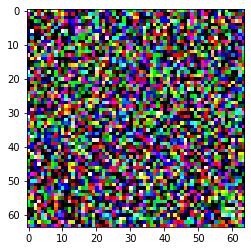

In [35]:
plt.imshow(test_image.reshape(64,64,3));

In [36]:
# test_image.reshape(64,64,3)
torch.manual_seed(42)
single_conv_block = nn.Conv2d(in_channels=3,
                              out_channels=10,
                              kernel_size=(3,3),
                              stride=1,
                              padding=1)

conv_output = single_conv_block(test_image)
conv_output.shape

torch.Size([10, 64, 64])

In [37]:
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_conv = single_conv_block(test_image.unsqueeze(dim=0))
print(f"After convolution test image shape: {test_image_conv.shape}")

test_image_conv_max_pool = max_pool_layer(test_image_conv)
print(f"After convolution and max pool layer the shape of test image: {test_image_conv_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
After convolution test image shape: torch.Size([1, 10, 64, 64])
After convolution and max pool layer the shape of test image: torch.Size([1, 10, 32, 32])


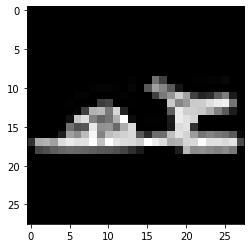

In [38]:
plt.imshow(img.squeeze(), cmap='gray')

In [39]:
torch.manual_seed(42)
rand_img_tensor = torch.randn(size=(1,28,28))
rand_img_tensor.shape[1]

28

In [40]:
model_2(rand_img_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [41]:
loss_fn_2 = nn.CrossEntropyLoss()

optimizer_2 =  torch.optim.SGD(params=model_2.parameters(),
                               lr=0.1)

In [42]:
# model_2.state_dict()

# Tuning and seeing how good(amazing) performance of CNNs

In [73]:
train_time_start_on_cuda = timer()
# LoopThroughAll(3, model_1, loss_fn, optimizer, train_dataloader, test_dataloader, device)
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------")

    LoopThroughTrain(model=model_2,
                     data_loader=train_dataloader,
                     optimizer=optimizer_2,
                     loss_fn=loss_fn_2,
                     accuracy_fn=accuracy_fn,
                     device=str(next(model_2.parameters()).device))
    
    LoopThroughTest(model=model_2,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn_2,
                    accuracy_fn=accuracy_fn,
                    device=str(next(model_2.parameters()).device))
train_time_end_on_cuda = timer()
time_on_model_2 = timer_fn(start=train_time_start_on_cuda, 
         end=train_time_end_on_cuda,
         device=str(next(model_2.parameters()).device))
time_on_model_2

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.28599| Train accuracy: 89.60%
Test loss: 0.33409| Test accuracy: 88.06%
Epoch: 1
--------
Train loss: 0.27664| Train accuracy: 89.92%
Test loss: 0.31896| Test accuracy: 88.79%
Epoch: 2
--------
Train loss: 0.26885| Train accuracy: 90.26%
Test loss: 0.31635| Test accuracy: 88.61%
Epoch: 3
--------
Train loss: 0.26226| Train accuracy: 90.47%
Test loss: 0.28857| Test accuracy: 89.75%
Epoch: 4
--------
Train loss: 0.25685| Train accuracy: 90.64%
Test loss: 0.28364| Test accuracy: 89.92%
Epoch: 5
--------
Train loss: 0.24991| Train accuracy: 90.86%
Test loss: 0.29664| Test accuracy: 89.44%
Epoch: 6
--------
Train loss: 0.24689| Train accuracy: 91.02%
Test loss: 0.29831| Test accuracy: 89.16%
Epoch: 7
--------
Train loss: 0.24272| Train accuracy: 91.11%
Test loss: 0.35202| Test accuracy: 87.15%
Epoch: 8
--------
Train loss: 0.23809| Train accuracy: 91.31%
Test loss: 0.30153| Test accuracy: 89.74%
Epoch: 9
--------
Train loss: 0.23750| Train accuracy: 91.25%
Te

133.76245023800038

In [74]:
time_on_model_1

103.9207974259989

In [75]:
model_2_results = eval_model(
    model=model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn_2,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3129374384880066,
 'model_accuracy': 88.90774760383387}

In [46]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47266891598701477,
 'model_accuracy': 83.55630990415335}

In [47]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.46212971210479736,
 'model_accuracy': 83.4464856230032}

In [76]:
model_dictionary = {"mode_name":[model_0_results['model_name'], model_1_results['model_name'], model_2_results['model_name']],
                    'model_loss':[model_0_results['model_loss'], model_1_results['model_loss'], model_2_results['model_loss']],
                    'model_accuracy':[model_0_results['model_accuracy'], model_1_results['model_accuracy'], model_2_results['model_accuracy']]}

# Comparing all coded NNs at a dataframe

In [77]:
import pandas as pd
model_comparison = pd.DataFrame(model_dictionary)
model_comparison

,mode_name,model_loss,model_accuracy
0,FashionMNISTModelV0,0.483196,83.546326
1,FashionMNISTModelV1,0.447833,84.285144
2,FashionMNISTModelV2,0.312937,88.907748


In [78]:
model_comparison["time_on_model"] = [time_on_model_0, time_on_model_1, time_on_model_2]
model_comparison

,mode_name,model_loss,model_accuracy,time_on_model
0,FashionMNISTModelV0,0.483196,83.546326,82.040535
1,FashionMNISTModelV1,0.447833,84.285144,103.920797
2,FashionMNISTModelV2,0.312937,88.907748,133.762450


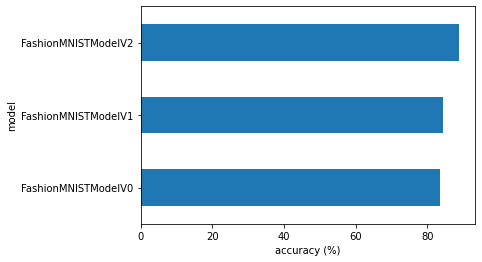

In [79]:
model_comparison.set_index('mode_name')['model_accuracy'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

# Making some random predictions on CNNs

In [52]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            #Adding extra dim and send the data into the target device
            sample = torch.unsqueeze(sample, dim=0).to(device)

            #Forward pass 
            pred = model(sample)

            #Find out the max probability of the modelled data
            pred_prob = torch.softmax(pred.squeeze(), dim=0)

            #Appending the results to the list
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [53]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [81]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

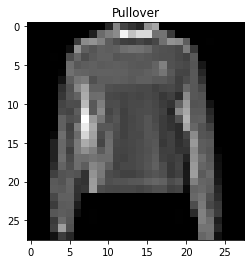

In [82]:
plt.imshow(test_samples[0].squeeze(), cmap='gray');
plt.title(class_names[test_labels[0]])

In [83]:
pred_probs = make_predictions(model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[9.5501e-04, 1.1057e-05, 9.7149e-01, 5.2356e-06, 1.7051e-02, 5.0947e-06,
         1.0463e-02, 6.3381e-08, 1.5112e-05, 3.1926e-06],
        [2.8395e-04, 1.3910e-06, 4.0765e-03, 2.1602e-07, 9.4443e-01, 2.7180e-08,
         5.1169e-02, 1.6062e-07, 3.0572e-05, 3.8914e-06]])

In [84]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 0, 4, 8, 0, 4, 1, 3])

In [85]:
test_labels

[2, 4, 0, 4, 8, 0, 6, 1, 3]

# Sending all test data to make predictions

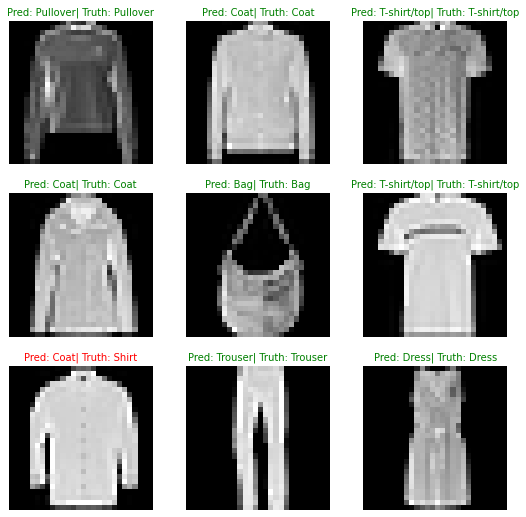

In [86]:
plt.figure(figsize=(9,9))
nrows, ncols = 3, 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label}| Truth: {truth_label}"

    if pred_label==truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    plt.axis(False)

In [87]:
y_preds = []
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc='Making predictions...'):
        X, y = X.to(device), y.to(device)

        preds = model_2(X)

        y_pred = torch.softmax(preds.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_preds_all = torch.cat(y_preds)
y_preds_all

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [88]:
len(y_preds_all)

10000

In [62]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing libries for creating Confusion matrix of the predicted data

In [63]:
try:
    import torchmetrics, mlxtend
    print(f"The version of mlxtend: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 19 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"The version of mlxtend: {mlxtend.__version__}")

The version of mlxtend: 0.21.0


# Creating a Confusion matrix to see how wrong the model works at making predictions

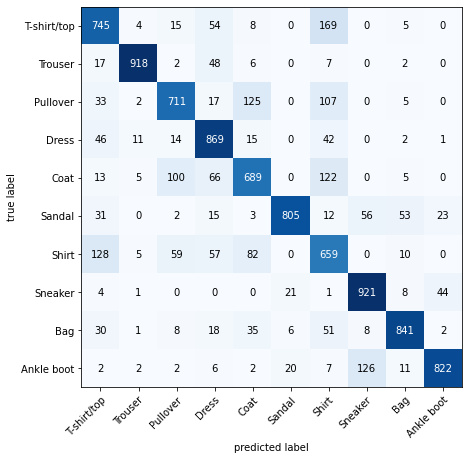

In [89]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_all,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

In [90]:
confmat_tensor

tensor([[745,   4,  15,  54,   8,   0, 169,   0,   5,   0],
        [ 17, 918,   2,  48,   6,   0,   7,   0,   2,   0],
        [ 33,   2, 711,  17, 125,   0, 107,   0,   5,   0],
        [ 46,  11,  14, 869,  15,   0,  42,   0,   2,   1],
        [ 13,   5, 100,  66, 689,   0, 122,   0,   5,   0],
        [ 31,   0,   2,  15,   3, 805,  12,  56,  53,  23],
        [128,   5,  59,  57,  82,   0, 659,   0,  10,   0],
        [  4,   1,   0,   0,   0,  21,   1, 921,   8,  44],
        [ 30,   1,   8,  18,  35,   6,  51,   8, 841,   2],
        [  2,   2,   2,   6,   2,  20,   7, 126,  11, 822]])

# Saving and reloading the best performing model

In [94]:
from pathlib import Path 

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'First_CNN_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model in the state_dict()

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/First_CNN_model.pth


In [93]:
# model_2.state_dict()

In [96]:
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [97]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3129374384880066,
 'model_accuracy': 88.90774760383387}

In [98]:
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn_2,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3129374384880066,
 'model_accuracy': 88.90774760383387}

In [99]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']))

tensor(True)